In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors

def plot_interaction_heatmap(df, output_file):
    """
    This function takes a DataFrame with 'Query_Protein', 'CID', 'interaction_type' columns
    and generates a heatmap showing interaction counts with colors representing interaction types.

    Arguments:
    df : pd.DataFrame - The input DataFrame with interaction data.
    """

    pairs = {}

    # group by query protein and CID and count the number of interactions
    for index, row in df.iterrows():
        key = (row['Query_Protein'], row['CID'])
        print(key)
        if key in pairs:
            pairs[key] += 1
        else:
            pairs[key] = 1

    # get the interaction type for each pair
    # if only upregulation - 1; if only downregulation - -1; if both - 2; if neither - 0
    types = {}
    for index, row in df.iterrows():
        key = (row['Query_Protein'], row['CID'])
        interactions = row['interaction_type'].split(',')
        if key in types:
            types[key] += interactions
        else:
            types[key] = interactions
    print(types)
    for key in types:
        # count number
        num_up = 0
        num_down = 0
        num_neutral = 0

        for interaction in types[key]:
            if interaction == 'Upregulation':
                num_up += 1
            elif interaction == 'Downregulation':
                num_down += 1
            elif interaction == 'Neutral':
                num_neutral += 1

        # whichever is max gets the type
        if num_up > num_down and num_up > num_neutral:
            types[key] = 'Upregulation'
        elif num_down > num_up and num_down > num_neutral:
            types[key] = 'Downregulation'
        elif num_neutral > num_up and num_neutral > num_down:
            types[key] = 'Neutral'
        else:
            types[key] = 'Unresolvable'


    # create new df
    data = []
    for key in types:
        # map type to num
        if types[key] == 'Upregulation':
            types[key] = 1
        elif types[key] == 'Downregulation':
            types[key] = -1
        elif types[key] == 'Neutral':
            types[key] = 0
        elif types[key] == 'Unresolvable':
            types[key] = 2
        data.append([key[0], key[1], types[key], pairs[key]])

        # create new df
    df = pd.DataFrame(data, columns=['Query_Protein', 'CID', 'solid_score', 'interaction_count'])
    print(df)

    # Pivot table for heatmap annotations (counts)
    count_heatmap_data = df.pivot_table(index='Query_Protein', columns='CID', values='interaction_count')

    # Pivot table for heatmap colors (interaction types)
    solid_heatmap_data = df.pivot_table(index='Query_Protein', columns='CID', values='solid_score')

    # Create a custom color map corresponding to interaction types
    cmap = mcolors.ListedColormap(['red', 'gray', 'blue', 'black'])
    bounds = [-1.5, -0.5, 0.5, 1.5, 2.5]  # Corresponding to Downregulation, Neutral, Upregulation, Unresolvable
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Plotting the heatmap with counts as annotations and interaction types as colors
    plt.figure(figsize=(12, 10))
    sns.heatmap(solid_heatmap_data, annot=count_heatmap_data, cmap=cmap, cbar=False, linewidths=.5, linecolor='black',
                norm=norm, mask=solid_heatmap_data.isnull(), fmt=".0f")
    plt.title('Interaction Count and Type Heatmap')
    plt.xlabel('CID')
    plt.ylabel('Query Protein')

    # Adding a custom legend for interaction types
    colors = {'Upregulation': 'Blue', 'Downregulation': 'Red', 'Neutral': 'Gray', 'Unresolvable': 'black'}
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

    plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title="Interaction Types")

    # Saving the figure with the legend outside
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()

# Example usage:
# df = pd.read_csv('your_input_file.csv')
# plot_interaction_heatmap(df)


csv1 = "extracted_relations_zero_shot.csv"
csv2 = "extracted_relations_few_shot.csv"
df1 = pd.read_csv(csv1)
df2 = pd.read_csv(csv2)

Zero Shot Method protein-Drug interactionHeatmap
('P00533', 135403800)
('P30291', 135403803)
('P05231', 135403800)
('P04637', 135403803)
('P05231', 135403800)
('P00533', 135403800)
('P28482', 135403800)
('P16035', 135403803)
('P84022', 135403803)
('P00533', 135398660)
('P20248', 135403803)
('P00533', 135403800)
('P11047', 135403803)
('Q15796', 135403803)
('P00533', 135403800)
('Q16539', 135403803)
('P00533', 135403800)
('P35354', 135403800)
('P05019', 135403803)
('P05362', 135403803)
{('P00533', 135403800): ['Neutral', 'Downregulation', 'Downregulation', 'Downregulation', 'Upregulation'], ('P30291', 135403803): ['Downregulation'], ('P05231', 135403800): ['Downregulation', 'Downregulation'], ('P04637', 135403803): ['Downregulation'], ('P28482', 135403800): ['Downregulation'], ('P16035', 135403803): ['Neutral'], ('P84022', 135403803): ['Downregulation'], ('P00533', 135398660): ['Upregulation'], ('P20248', 135403803): ['Upregulation'], ('P11047', 135403803): ['Upregulation'], ('Q15796', 1

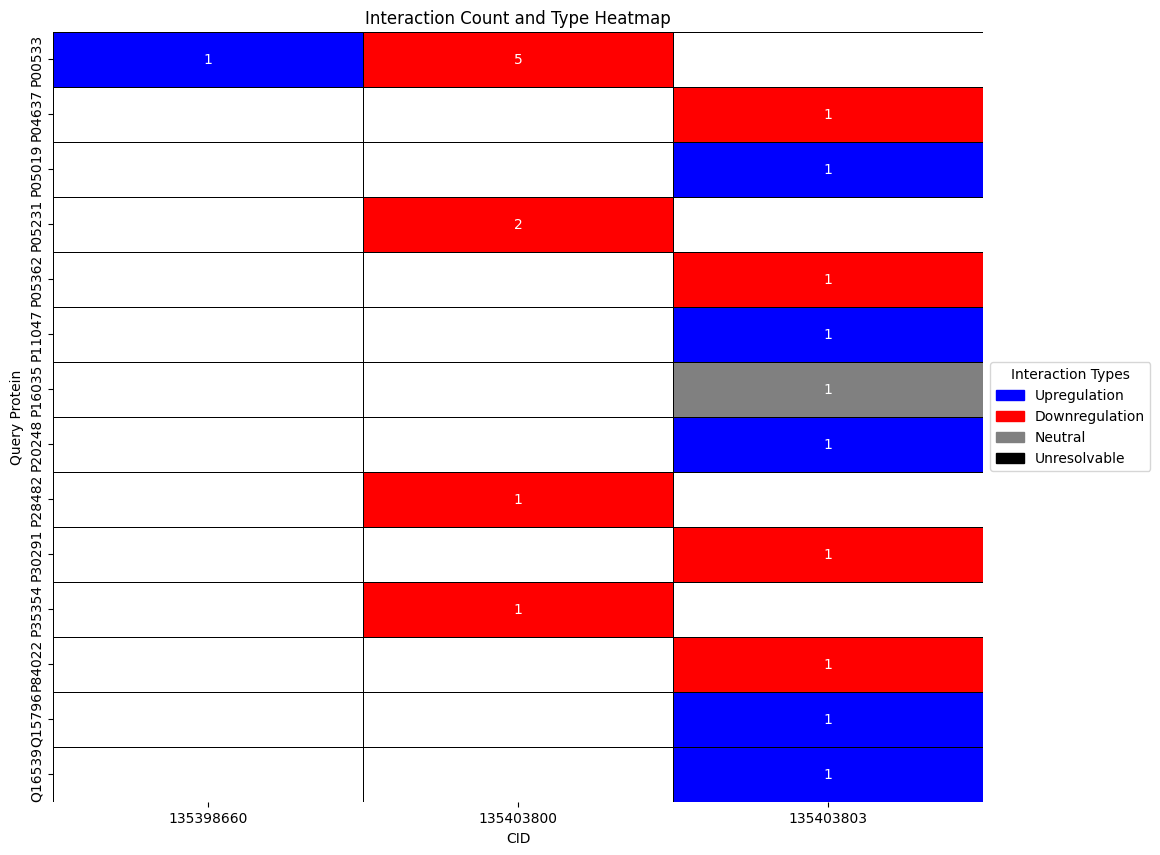

In [ ]:
print("Zero Shot Method protein-Drug interactionHeatmap")
plot_interaction_heatmap(df2, "zero_shot_heatmap.png")

Few Shot Method protein-Drug interactionHeatmap
('P00533', 135403800)
('P30291', 135403803)
('P05231', 135403800)
('P04637', 135403803)
('P05231', 135403800)
('P00533', 135403800)
('P28482', 135403800)
('P16035', 135403803)
('P84022', 135403803)
('P00533', 135398660)
('P20248', 135403803)
('P00533', 135403800)
('P11047', 135403803)
('Q15796', 135403803)
('P00533', 135403800)
('Q16539', 135403803)
('P00533', 135403800)
('P35354', 135403800)
('P05019', 135403803)
('P05362', 135403803)
{('P00533', 135403800): ['Neutral', 'Upregulation', 'Downregulation', 'Upregulation', 'Neutral'], ('P30291', 135403803): ['Downregulation'], ('P05231', 135403800): ['Downregulation', 'Downregulation'], ('P04637', 135403803): ['Downregulation'], ('P28482', 135403800): ['Downregulation'], ('P16035', 135403803): ['Neutral'], ('P84022', 135403803): ['Downregulation'], ('P00533', 135398660): ['Upregulation'], ('P20248', 135403803): ['Upregulation'], ('P11047', 135403803): ['Upregulation'], ('Q15796', 135403803):

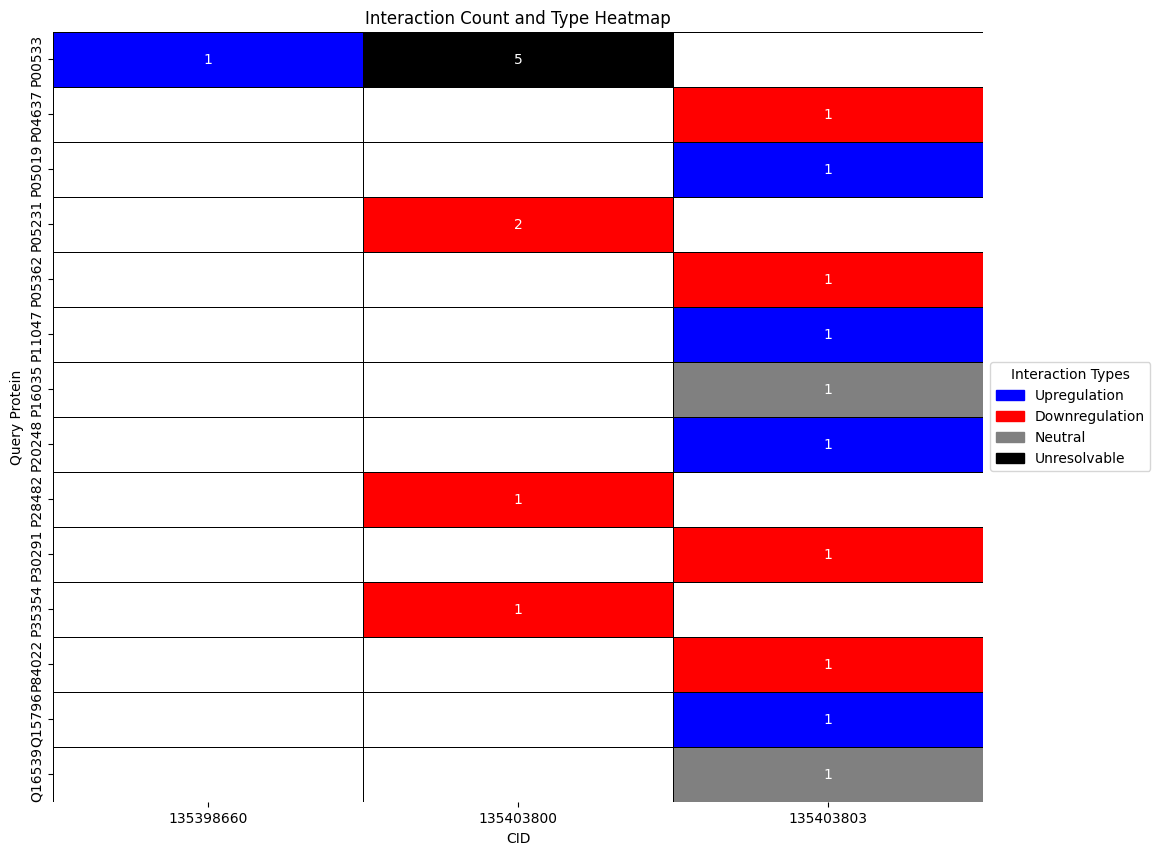

In [ ]:
print("Few Shot Method protein-Drug interactionHeatmap")
plot_interaction_heatmap(df1, "few_shot_heatmap.png")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_interaction(path):
    df = pd.read_csv(path)

    drug_protein_interaction = {}

    for index, row in df.iterrows():
        drug = row['CID']
        protein = row['Query_Protein']
        if (drug, protein) not in drug_protein_interaction:
            drug_protein_interaction[(drug, protein)] = {
                'Upregulation': 0,
                'Downregulation': 0,
                'Neutral': 0,
                'Upregulation_count': 0,
                'Downregulation_count': 0,
                'Neutral_count': 0,
            }
        interaction = row['interaction_type']
        drug_protein_interaction[(drug, protein)][interaction] += row['expt_weight']
        if interaction == 'Upregulation':
            drug_protein_interaction[(drug, protein)]['Upregulation_count'] += 1
        elif interaction == 'Downregulation':
            drug_protein_interaction[(drug, protein)]['Downregulation_count'] += 1
        else:
            drug_protein_interaction[(drug, protein)]['Neutral_count'] += 1

    return drug_protein_interaction

def merge_scores(drug_protein_interaction):
    for key in drug_protein_interaction:
        interaction = drug_protein_interaction[key]
        # Calculate the final score
        interaction['final_score'] = interaction['Upregulation'] - interaction['Downregulation']

        if interaction['Neutral'] > interaction['Upregulation'] and interaction['Neutral'] > interaction['Downregulation']:
            interaction['final_score'] = 0

        if interaction['Upregulation'] == interaction['Downregulation'] and interaction['Upregulation'] > interaction['Neutral'] and interaction['Upregulation'] > 0:
            interaction['final_score'] = np.inf

    return drug_protein_interaction

def create_heatmap(drug_protein_interaction):
    # Convert the interaction dictionary to a DataFrame for easy manipulation
    data = {
        'Drug': [],
        'Protein': [],
        'Score': []
    }

    for (drug, protein), interaction in drug_protein_interaction.items():
        data['Drug'].append(drug)
        data['Protein'].append(protein)
        # Replace inf with a large number for visualization
        score = interaction['final_score']
        if score == np.inf:
            score = 1e10  # A very large number
        data['Score'].append(score)

    df_interactions = pd.DataFrame(data)

    # Pivot the data to create a matrix format for the heatmap
    heatmap_data = df_interactions.pivot(index='Protein', columns='Drug', values='Score')
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar_kws={'label': 'Interaction Score'})
    plt.title("Drug-Protein Interaction Heatmap")
    plt.show()

def save_to_csv(interaction, path):
    data = {
        'Drug': [],
        'Protein': [],
        'Upregulation': [],
        'Downregulation': [],
        'Neutral': [],
        'Final Score': [],
        'Upregulation_count': [],
        'Downregulation_count': [],
        'Neutral_count': [],
    }

    for (drug, protein), interactions in interaction.items():
        data['Drug'].append(drug)
        data['Protein'].append(protein)
        data['Upregulation'].append(interactions['Upregulation'])
        data['Downregulation'].append(interactions['Downregulation'])
        data['Neutral'].append(interactions['Neutral'])
        data['Upregulation_count'].append(interactions['Upregulation_count'])
        data['Downregulation_count'].append(interactions['Downregulation_count'])
        data['Neutral_count'].append(interactions['Neutral_count'])
        data['Final Score'].append(interactions['final_score'])

    df = pd.DataFrame(data)
    df.to_csv(path, index=False)

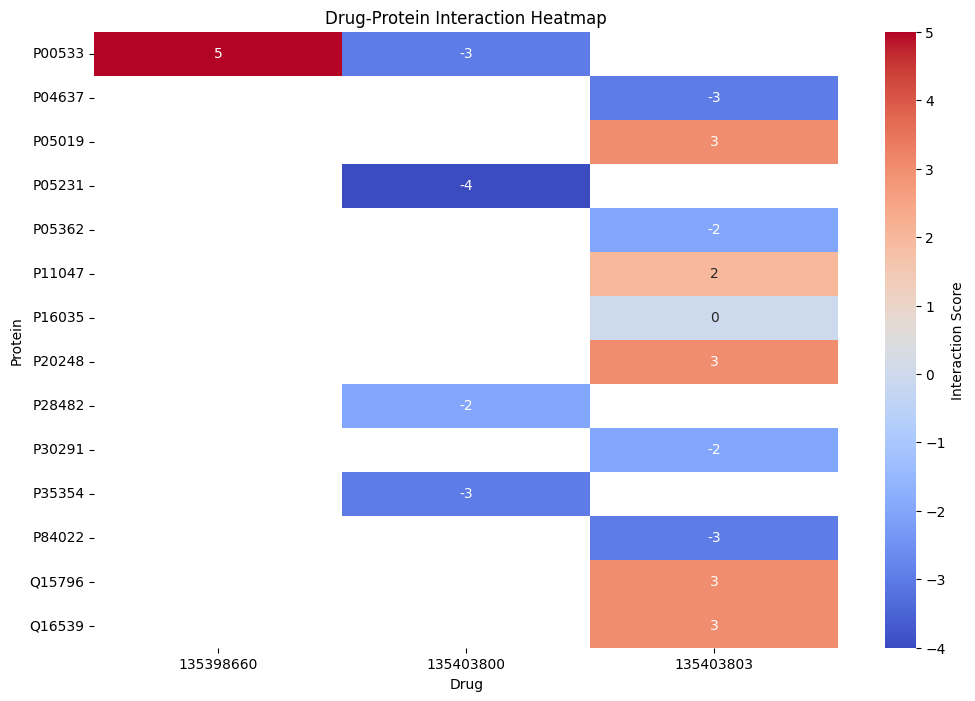

In [ ]:
path = 'extracted_relations_zero_shot.csv'
drug_protein_interaction = calculate_interaction(path)
df = pd.DataFrame(drug_protein_interaction)
# save it as a csv file
merged_interactions = merge_scores(drug_protein_interaction)
save_to_csv(merged_interactions, 'drug_protein_interaction_matrix_zero_shot.csv')
create_heatmap(merged_interactions)

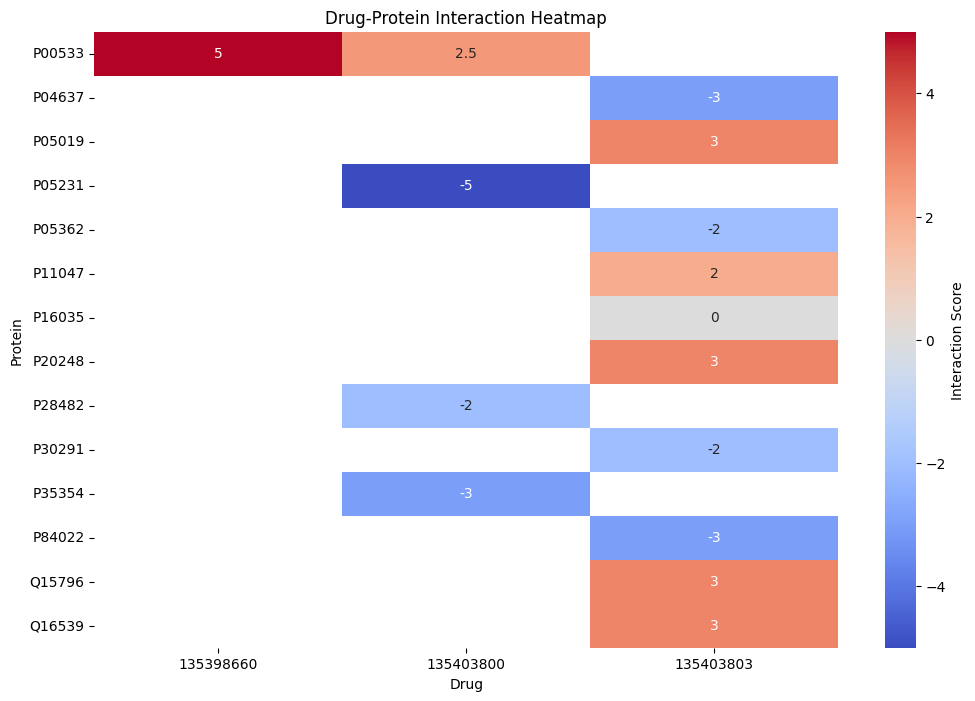

In [ ]:
# Example usage
path = 'extracted_relations_few_shot.csv'
drug_protein_interaction = calculate_interaction(path)
# save it as a csv file
merged_interactions = merge_scores(drug_protein_interaction)
save_to_csv(merged_interactions, 'drug_protein_interaction_matrix_few_shot.csv')
create_heatmap(merged_interactions)